In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
df=pd.read_excel('./Data.xlsx',sheet_name='Sheet1')

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

model=LogisticRegression(solver='lbfgs',max_iter=100000)

In [79]:
X=df[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','12percentage','CollegeTier','collegeGPA','CollegeCityTier','English','Logical','Quant','ComputerProgramming','ElectronicsAndSemicon','Domain','ElectricalEngg','CivilEngg','MechanicalEngg']].values

X=preprocessing.scale(X)
y=df["High-Salary"].values

In [92]:


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=11,train_size=0.8806)
model.fit(X_train,y_train)
print("Model Score- " ,model.score(X_test,y_test))
y_predicted=model.predict(X_test)
print("Accuracy in (%) =",accuracy_score(y_test,y_predicted)*100,"%")
print()
print("Classification Report")
print()
labels=["0 - Low Salary","1- High Salary"]
print(classification_report(y_test, y_predicted,target_names=labels))

Model Score-  0.7426778242677824
Accuracy in (%) = 74.26778242677824 %

Classification Report

                precision    recall  f1-score   support

0 - Low Salary       0.73      0.69      0.71       216
1- High Salary       0.75      0.79      0.77       262

      accuracy                           0.74       478
     macro avg       0.74      0.74      0.74       478
  weighted avg       0.74      0.74      0.74       478



CONFUSION MATRIX



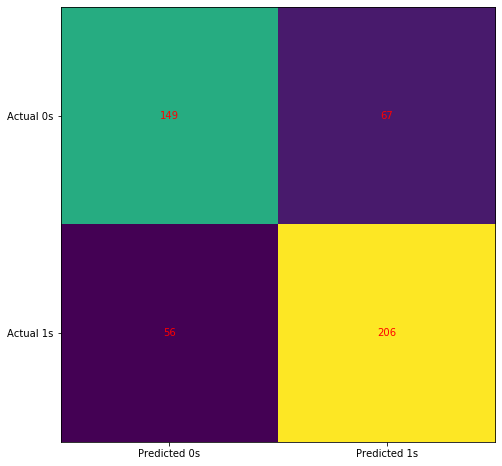

In [94]:
print("CONFUSION MATRIX\n")
cm =confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()